In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [59]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi * X)

In [60]:
# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(30)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

In [61]:
# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.rand(n_samples) * 0.1

1의 회귀계수는 [-2.]
1의 MSE는 0.4269651406185425
4의 회귀계수는 [  2. -24.  34. -12.]
4의 MSE는 0.005840107617740103
15의 회귀계수는 [-1.29000000e+02  4.28600000e+03 -7.70560000e+04  8.51746000e+05
 -6.24246600e+06  3.17463340e+07 -1.15313873e+08  3.04379522e+08
 -5.88294301e+08  8.31076456e+08 -8.47323756e+08  6.06349450e+08
 -2.88677391e+08  8.20484910e+07 -1.05273130e+07]
15의 MSE는 132.74015378812638


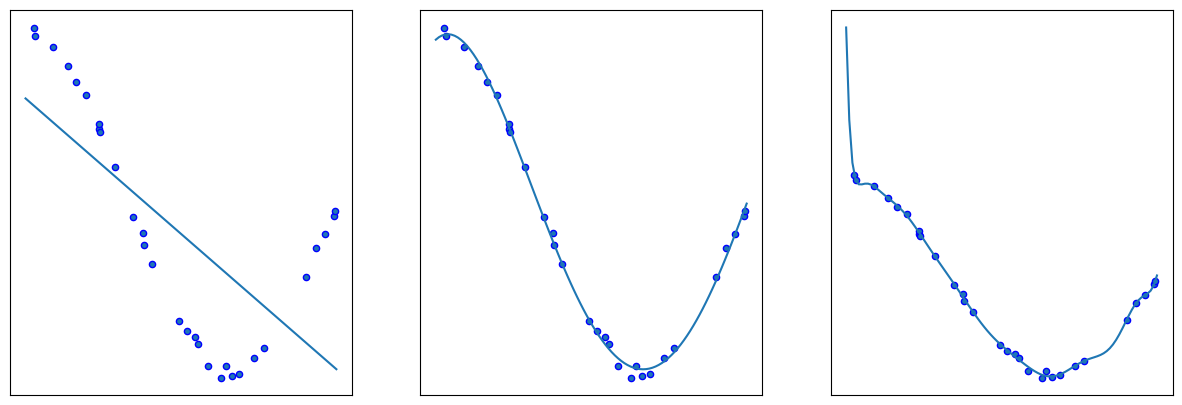

In [63]:
plt.figure(figsize=(15,5))
degrees = [1,4,15]
# 다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degreee별로 polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features',polynomial_features),
                         ('linear_regression',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10 )
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps[객체명]을 이용해 회귀계수 추출
    cofficients = pipeline.named_steps['linear_regression'].coef_
    print(f'{degrees[i]}의 회귀계수는 {np.round(cofficients)}')
    print(f'{degrees[i]}의 MSE는 {-1*np.mean(scores)}')

    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label = 'True function')
    plt.scatter(X,y,edgecolors='b', s=20, label = 'Samples')
